In [138]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer

In [139]:
#loading in the data
df = pd.read_csv('data/data_clean.csv')
#df.head(10)

In [140]:
df.columns

Index(['Unnamed: 0', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [141]:
df.columns = df.columns.str.replace(' ', '_')

In [142]:
df.shape

(3333, 19)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed:_0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

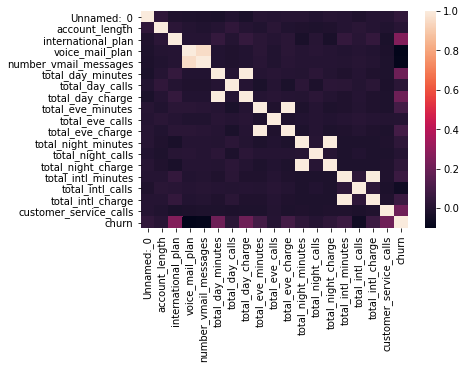

In [144]:
df.corr()
sns.heatmap(df.corr());

In [145]:
def scores(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    acc_print = f'The Accuracy is {acc}'
    f1_print = f'The F1 score is {f1}'
    precision_print = f'The Precision score is {precision}'
    recall_print = f'The recall is {recall}'
    return(acc_print, f1_print, precision_print, recall_print)

In [146]:
corrs = df.corr().abs()['churn'].sort_values(ascending=False).drop('churn')
ordered_corrs = corrs.index
ordered_corrs

Index(['international_plan', 'customer_service_calls', 'total_day_minutes',
       'total_day_charge', 'voice_mail_plan', 'total_eve_minutes',
       'total_eve_charge', 'number_vmail_messages', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls', 'Unnamed:_0',
       'total_night_charge', 'total_night_minutes', 'total_day_calls',
       'account_length', 'total_eve_calls', 'total_night_calls'],
      dtype='object')

In [147]:
df = df.drop('number_vmail_messages', axis=1)
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
df = df.drop('Unnamed:_0', axis=1)

In [148]:
y = df['churn']
X = df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)

dummy_model = DummyClassifier(strategy='most_frequent', random_state=69)
dummy_model.fit(X_train,y_train)
dummy_model.score(X_test,y_test)

0.8477218225419664

In [149]:
#from imblearn.over_sampling import SMOTE
#print('Original class distribution: \n')
#print(y.value_counts())
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
#print('-----------------------------------------')
#print('Synthetic sample class distribution: \n')
#print(pd.Series(y_train_resampled).value_counts()) 

In [150]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [151]:
log_reg = LogisticRegression(max_iter = 1000, random_state=69)
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled,y_test)

0.8585131894484412

In [152]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

log_reg = LogisticRegression(random_state=69)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

print(rfe.n_features_)
print(rfe.ranking_)


5
[7 1 1 1 5 1 6 4 8 3 2 1]


In [153]:
df.head()
fet_df = df.drop(['account_length', 'total_day_calls', 'total_eve_calls', 'total_night_minutes', 'total_night_calls','total_intl_minutes','total_intl_calls'], axis=1)

# Logistic Regs

In [154]:
y_fet = fet_df['churn']
X_fet = fet_df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
log_reg = LogisticRegression(random_state=69)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=69)

In [155]:
cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()

0.8551422845691382

In [156]:
log_reg.score(X_test_scaled,y_test)

0.8860911270983214

In [157]:
param_grid = {
    'max_iter': [100,1000,5000],
    'C': [0.001,0.009,0.01,0.09,1,5,10,25],
    'class_weight': ['None', 'balanced']

}

gs_log = GridSearchCV(log_reg, param_grid, cv=5)
gs_log.fit(X_train_scaled, y_train)

print(gs_log.best_estimator_.score(X_test_scaled, y_test))
gs_log.best_estimator_

0.8836930455635491


LogisticRegression(C=0.09, class_weight='None', random_state=69)

('The Accuracy is 0.8597122302158273', 'The F1 score is 0.2641509433962264', 'The Precision score is 0.65625', 'The recall is 0.16535433070866143')


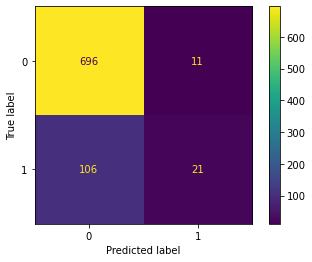

In [207]:
best_log = LogisticRegression(C=0.09, class_weight='None', random_state=69)
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
best_log.fit(X_train_scaled, y_train)

log_preds = best_log.predict(X_test_scaled)
print(scores(y_test, log_preds))
cm = confusion_matrix(y_test, log_preds, labels=best_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_log.classes_)
disp.plot();
log_tn = cm[0][0]
log_fn = cm[1][0]
log_tp = cm[1][1]
log_fp = cm[0][1]

# Trees

In [159]:
tree_model = DecisionTreeClassifier(random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.9091655310621242


0.9088729016786571

In [160]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(tree_model, param_grid, cv=5)
gs_tree.fit(X_train_scaled, y_train)

#gs_tree.best_estimator_(X_test_scaled, y_test)

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=69),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_split': [1, 5, 10, 20]})

In [161]:
tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.9323735470941884


0.9328537170263789

# Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
print(cross_val_score(naive_bayes,X_train_scaled,y_train).mean())
naive_bayes.score(X_test_scaled, y_test)
y_pred = naive_bayes.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.8459414829659317


0.4675324675324676

# K Nearest Neighbors

In [163]:
state_farm_model = KNeighborsClassifier()
state_farm_model.fit(X_train_scaled, y_train)
print(cross_val_score(state_farm_model,X_train_scaled,y_train).mean())
state_farm_model.score(X_test_scaled, y_test)
y_pred = state_farm_model.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.8911567134268538


0.4725274725274725

In [205]:
param_grid = {
    'n_neighbors': [5,9,13,19,27],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan'],
    'leaf_size': [2,5,9,15],
}

gs_knn = GridSearchCV(state_farm_model, param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)

gs_knn.best_estimator_.score(X_test_scaled, y_test)
gs_knn.best_estimator_

KNeighborsClassifier(leaf_size=2, metric='euclidean')

('The Accuracy is 0.8836930455635491', 'The F1 score is 0.42603550295857984', 'The Precision score is 0.8571428571428571', 'The recall is 0.28346456692913385')


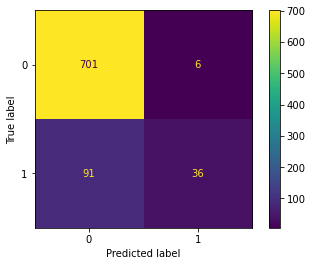

In [208]:
best_knn = KNeighborsClassifier(leaf_size=2, metric='euclidean', n_neighbors=9)
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
best_knn.fit(X_train_scaled, y_train)

knn_preds = best_knn.predict(X_test_scaled)
print(scores(y_test, knn_preds))
cm = confusion_matrix(y_test, knn_preds, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_knn.classes_)
disp.plot();
knn_tn = cm[0][0]
knn_fn = cm[1][0]
knn_tp = cm[1][1]
knn_fp = cm[0][1]

### Reducing Variables

In [165]:
feats = ['international_plan','customer_service_calls','total_day_minutes','total_eve_minutes']
knn_x = df[feats]
X_train_knn, X_test_knn, y_train, y_test = train_test_split(knn_x,y, random_state=69)
normal = Normalizer()
X_train_knn_normal = normal.transform(X_train_knn)
X_test_knn_normal = normal.transform(X_test_knn)
knn = KNeighborsClassifier()

knn.fit(X_train_knn_normal,y_train)
print(cross_val_score(knn,X_train_scaled,y_train).mean())
knn.score(X_test_knn_normal, y_test)


0.8911567134268538


0.8441247002398081

## Finding Feture combinations

In [166]:
ordered_corrs = list(ordered_corrs)
for i in range(1, len(ordered_corrs)):
    var = ordered_corrs[:i]
    knn_x = df[var]
    X_train_knn, X_test_knn, y_train, y_test = train_test_split(knn_x,y, random_state=69)
    normal = Normalizer()
    X_train_knn_normal = normal.transform(X_train_knn)
    X_test_knn_normal = normal.transform(X_test_knn)
    knn = KNeighborsClassifier()
    knn.fit(X_train_knn_normal,y_train)
    print(f'This the basic Knn model with {var}')
    print(f'Train:',cross_val_score(knn,X_train_scaled,y_train).mean())
    print(f'Test:',knn.score(X_test_knn_normal, y_test))


This the basic Knn model with ['international_plan']
Train: 0.8911567134268538
Test: 0.842925659472422
This the basic Knn model with ['international_plan', 'customer_service_calls']
Train: 0.8911567134268538
Test: 0.8441247002398081
This the basic Knn model with ['international_plan', 'customer_service_calls', 'total_day_minutes']
Train: 0.8911567134268538
Test: 0.8501199040767387


KeyError: "['total_day_charge'] not in index"

In [167]:
ordered_corrs 


['international_plan',
 'customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'voice_mail_plan',
 'total_eve_minutes',
 'total_eve_charge',
 'number_vmail_messages',
 'total_intl_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'Unnamed:_0',
 'total_night_charge',
 'total_night_minutes',
 'total_day_calls',
 'account_length',
 'total_eve_calls',
 'total_night_calls']

# Random Forest

In [168]:
forest = RandomForestClassifier(random_state=69)
forest.fit(X_train_scaled, y_train)
print(cross_val_score(forest,X_train_scaled,y_train).mean())
forest.score(X_test_scaled, y_test)
y_pred =  forest.predict(X_test_scaled)

f1_score(y_test,y_pred)

0.9455831663326653


0.789237668161435

In [169]:
grid_one = {
    'tree__n_estimators': [10],
    'tree__criterion': ['entropy'],
    'tree__max_depth': [15],
    'tree__min_weight_fraction_leaf' : [0.2],
    'tree__max_leaf_nodes' : [None, 10, 15, 50, 100],
    'tree__class_weight' : ['balanced']
}
pipe = Pipeline([('tree', RandomForestClassifier(random_state=69))])

gridsearch = GridSearchCV(estimator=pipe,
                         param_grid=grid_one,
                         cv=5)
gridsearch.fit(X_train,y_train)

gridsearch.score(X_test, y_test)

print(gridsearch)
#gs_knn = GridSearchCV(state_farm_model, param_grid, cv=5)
#gs_knn.fit(X_train_scaled, y_train)

#gs_knn.best_estimator_.score(X_test_scaled, y_test)
#gs_knn.best_estimator_

#{'classifier' : [RandomForestClassifier()],
#    'classifier__n_estimators' : list(range(10,101,10)),
#    'classifier__max_features' : list(range(6,32,5))}
#]

#forest = RandomForestClassifier(random_state=69)
#forest.fit(X_train_scaled, y_train)
#print(cross_val_score(forest,X_train_scaled,y_train).mean())
#forest.score(X_test_scaled, y_test)
#y_pred =  forest.predict(X_test_scaled)

#f1_score(y_test,y_pred)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree',
                                        RandomForestClassifier(random_state=69))]),
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['entropy'],
                         'tree__max_depth': [15],
                         'tree__max_leaf_nodes': [None, 10, 15, 50, 100],
                         'tree__min_weight_fraction_leaf': [0.2],
                         'tree__n_estimators': [10]})


In [170]:
gridsearch.best_estimator_

Pipeline(steps=[('tree',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=15,
                                        min_weight_fraction_leaf=0.2,
                                        n_estimators=10, random_state=69))])

('The Accuracy is 0.7853717026378897', 'The F1 score is 0.4281150159744409', 'The Precision score is 0.3602150537634409', 'The recall is 0.5275590551181102')


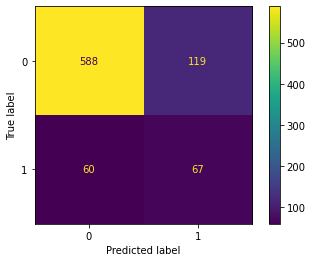

In [285]:
best_forest = RandomForestClassifier(class_weight='balanced',
                                     criterion='entropy', max_depth=15,
                                     min_weight_fraction_leaf=0.2,
                                     n_estimators=10, random_state=69)
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
best_forest.fit(X_train, y_train)
forest_preds = best_forest.predict(X_test)
print(scores(y_test, forest_preds))
cm = confusion_matrix(y_test, forest_preds, labels=ideal_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ideal_tree.classes_)
disp.plot();
forest_tn = cm[0][0]
forest_fn = cm[1][0]
forest_tp = cm[1][1]
forest_fp = cm[0][1]

## desicion tree baseline model

In [172]:
#we picked total night calls because it has the lowest corr

X_baseline = df[['total_night_calls']]
tree_model = DecisionTreeClassifier(class_weight='balanced',random_state=69)
X_train_baseline, X_test_baseline, y_train, y_test = train_test_split(X_baseline,y, random_state=69)
tree_model.fit(X_train_baseline, y_train)
print(cross_val_score(tree_model,X_train_baseline,y_train).mean())
#tree_model.score(X_test_baseline, y_test)
y_pred = tree_model.predict(X_test_baseline)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(y_test)
print(y_pred)

0.5002100200400801
0.2230769230769231
0.4566929133858268
0.1475826972010178
2909    0
2438    0
2150    1
2882    1
1161    0
       ..
295     0
282     0
3073    0
2402    1
2460    0
Name: churn, Length: 834, dtype: int64
[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 

# Grid searching for best params

In [173]:
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
d_tree = DecisionTreeClassifier(random_state=69)
param_grid = {
    'max_depth': [3,5,10],
    'min_samples_split': [2,10,25],
    'min_samples_leaf': [1, 5, 15],
    'min_weight_fraction_leaf': [0.0, 0.1,0.2],
    'max_leaf_nodes': [5,10,25],
    'class_weight' : ['balanced']
}
grid_clf = GridSearchCV(d_tree, param_grid, cv=5, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
grid_clf.best_estimator_

Grid Search found the following optimal parameters: 
class_weight: 'balanced'
max_depth: 5
max_leaf_nodes: 25
min_samples_leaf: 5
min_samples_split: 25
min_weight_fraction_leaf: 0.0

Training Accuracy: 90.16%
Validation accuracy: 87.65%


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=25,
                       min_samples_leaf=5, min_samples_split=25,
                       random_state=69)

('The Accuracy is 0.8764988009592326', 'The F1 score is 0.6791277258566978', 'The Precision score is 0.5618556701030928', 'The recall is 0.8582677165354331')


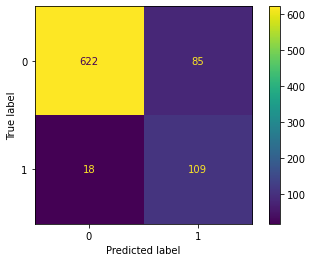

In [192]:
ideal_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=25,
                       min_samples_leaf=5, min_samples_split=25,
                       random_state=69)
ideal_tree.fit(X_train, y_train)
tree_preds = ideal_tree.predict(X_test)
print(scores(y_test, tree_preds))
cm = confusion_matrix(y_test, tree_preds, labels=ideal_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ideal_tree.classes_)
disp.plot();
tree_tn = cm[0][0]
tree_fn = cm[1][0]
tree_tp = cm[1][1] 
tree_fp = cm[0][1]

# FP and FN notes

We would rather have more false positives rather than False negatives because we can afford to have a false positive because we would be loosing less money if we identified someone is going to churn and gave them a small discount to keep them as a customer vs missing a customer who is going to churn and loosing their buisness completly

# XBG

In [269]:
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xg_train_pred = xbg.predict(X_train)
xg_test_pred = xbg.predict(X_test)
print(accuracy_score(y_train, xg_train_pred))
print(accuracy_score(y_test, xg_test_pred))

[14:29:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9679871948779512
0.9496402877697842


In [270]:
scores(y_test, xg_test_pred)

('The Accuracy is 0.9496402877697842',
 'The F1 score is 0.8189655172413793',
 'The Precision score is 0.9047619047619048',
 'The recall is 0.7480314960629921')

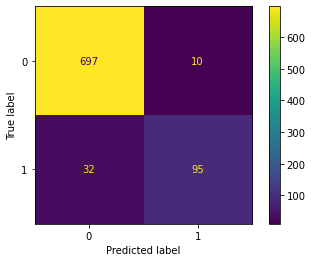

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, xg_test_pred, labels=xbg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xbg.classes_)
disp.plot();

In [178]:
param_grid = {
    'learning_rate': [0.05,0.1, 0.2],
    'max_depth': [6,10,12],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [10,25,100],
}
grid_clf = GridSearchCV(xbg, param_grid, scoring='recall', cv=5, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

D:\Anaconda\envs\learn-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:10:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:11:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [179]:
y_pred_xgb = grid_clf.predict(X_test)

In [180]:
precision_score(y_test, y_pred_xgb)

0.9047619047619048

In [181]:
recall_score(y_test, y_pred_xgb)

0.7480314960629921

In [182]:
f1_score(y_test, y_pred_xgb)

0.8189655172413793

In [183]:
accuracy_score(y_test, y_pred_xgb)

0.9496402877697842

In [184]:
best_parameters

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 10,
 'subsample': 0.7}

In [356]:
y = df['churn']
X = df.drop('churn', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)

xgb = XGBClassifier(learning_rate= 0.2,
max_depth= 5,
min_child_weight= 2,
gamma=2.6,
n_estimators= 10,
subsample= 0.7)
xgb.fit(X_train,y_train)
xg_train_pred = xgb.predict(X_train)
xg_test_pred = xgb.predict(X_test)

[16:09:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


('The Accuracy is 0.961984793917567', 'The F1 score is 0.8522550544323484', 'The Precision score is 0.9547038327526133', 'The recall is 0.7696629213483146')
('The Accuracy is 0.9544364508393285', 'The F1 score is 0.8389830508474576', 'The Precision score is 0.908256880733945', 'The recall is 0.7795275590551181')


335

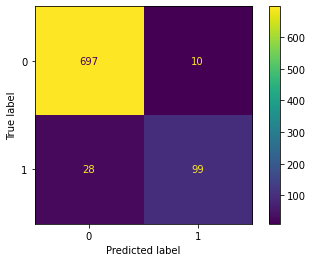

In [357]:
print(scores(y_train, xg_train_pred))
print(scores(y_test, xg_test_pred))
cm = confusion_matrix(y_test, xg_test_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb.classes_)
disp.plot();
xgb_tn = cm[0][0]
xgb_fn = cm[1][0] 
xgb_tp = cm[1][1]
xgb_fp = cm[0][1]

335

# Picking a model based on number of false Negatives

In [311]:
models_fp = [xgb_fp, tree_fp, forest_fp, log_fp, knn_fp]
models_fn = [xgb_fn, tree_fn, forest_fn, log_fn, knn_fn]
models_tp = [xgb_tp, tree_tp, forest_tp, log_tp, knn_tp]
models_tn = [xgb_tn, tree_tn, forest_tn, log_tn, knn_tn]

models_tn

In [312]:
min(models_fn)

18

In [313]:
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    acc_print = f'The Accuracy is {acc}'
    f1_print = f'The F1 score is {f1}'
    precision_print = f'The Precision score is {precision}'
    recall_print = f'The recall is {recall}'
    return(acc_print, f1_print, precision_print, recall_print)

NameError: name 'y_true' is not defined

In [314]:
models_list = [xbg,ideal_tree,best_forest,best_log,best_knn]
models_list

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.2, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=10, n_jobs=16, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
               tree_method='exact', validate_parameters=1, verbosity=None),
 DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=25,
                        min_samples_leaf=5, min_samples_split=25,
                        random_state=69),
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=15, min_weight_fraction_leaf=0.2,
                        n_estimators=10, random_state=69),
 LogisticRegression(C=0.09, c

In [315]:
from sklearn.metrics import roc_auc_score
# the formated {modell} thing was a mistake that instead of fixing i adjusted to use in the print thats all that is doing
def scores_improved(model, y_true):
    modell = 'model'   
    acc = accuracy_score(y_true, model.predict(X_test))
    f1 = f1_score(y_true, model.predict(X_test))
    precision = precision_score(y_true, model.predict(X_test))
    recall = recall_score(y_true, model.predict(X_test))
    roc = roc_auc_score(y_true, model.predict(X_test))
    roc_print = f'The ROC score for {modell} is {roc}'
    acc_print = f'The Accuracy for {modell} is {acc}'
    f1_print = f'The F1 score for {modell} is {f1}'
    precision_print = f'The Precision score for {modell} is {precision}'
    recall_print = f'The recall for {modell} is {recall}'
    return(acc_print,f1_print,precision_print,recall_print,roc_print)

In [316]:
y = df['churn']
X = df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
#Redefining the X and Y dfs just incase the scaled X data is currently set to X_test and X_train

scores_improved(xgb, y_test)

('The Accuracy for model is 0.9532374100719424',
 'The F1 score for model is 0.832618025751073',
 'The Precision score for model is 0.9150943396226415',
 'The recall for model is 0.7637795275590551',
 'The ROC score for model is 0.8755248415730211')

In [245]:
scores_improved(ideal_tree, y_test)

('The Accuracy for model is 0.8764988009592326',
 'The F1 score for model is 0.6791277258566978',
 'The Precision score for model is 0.5618556701030928',
 'The recall for model is 0.8582677165354331',
 'The ROC score for model is 0.8690207040951564')

In [246]:
scores_improved(best_forest, y_test)

('The Accuracy for model is 0.7853717026378897',
 'The F1 score for model is 0.4281150159744409',
 'The Precision score for model is 0.3602150537634409',
 'The recall for model is 0.5275590551181102',
 'The ROC score for model is 0.6796211117174709')

I hard coded X_test into my function so in order to scale it for the next two tests we're scaling the X data here. We have to replace X_test with the scaled X_test instead of using a different variable because of my hard coding

In [247]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [248]:
scores_improved(best_log, y_test)

('The Accuracy for model is 0.8597122302158273',
 'The F1 score for model is 0.2641509433962264',
 'The Precision score for model is 0.65625',
 'The recall for model is 0.16535433070866143',
 'The ROC score for model is 0.5748978159908229')

In [249]:
scores_improved(best_knn, y_test)

('The Accuracy for model is 0.8836930455635491',
 'The F1 score for model is 0.42603550295857984',
 'The Precision score for model is 0.8571428571428571',
 'The recall for model is 0.28346456692913385',
 'The ROC score for model is 0.6374890019935627')

In [287]:
print(models_fp)
print(models_fn)
print(models_tp) 
print(models_tn)




[10, 85, 119, 11, 6]
[32, 18, 60, 106, 91]
[95, 109, 67, 21, 36]
[697, 622, 588, 696, 701]


In [298]:
errors = {}
model_number = 0 
for dictionary in dict_list:
    error = dictionary['fp'] + dictionary['fn']
    model_number += 1
    errors[model_number] = error

print(errors)

{1: 42, 2: 103, 3: 179, 4: 117, 5: 97}


In [299]:
print(models_list)
errors

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None), DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=25,
                       min_samples_leaf=5, min_samples_split=25,
                       random_state=69), RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_weight_fraction_leaf=0.2,
                       n_estimators=10, random_state=69), LogisticRegression(C=0.09, class_weight='N

{1: 42, 2: 103, 3: 179, 4: 117, 5: 97}

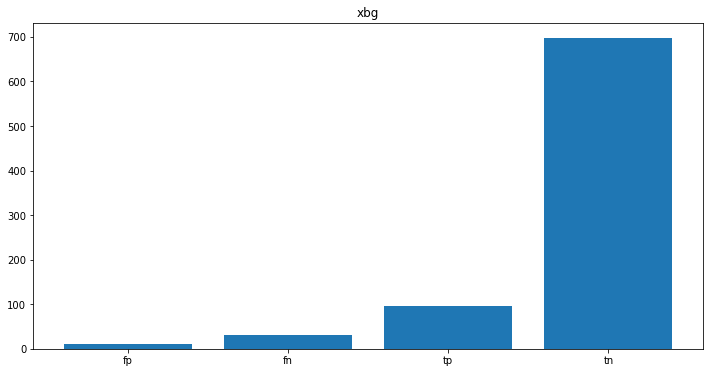

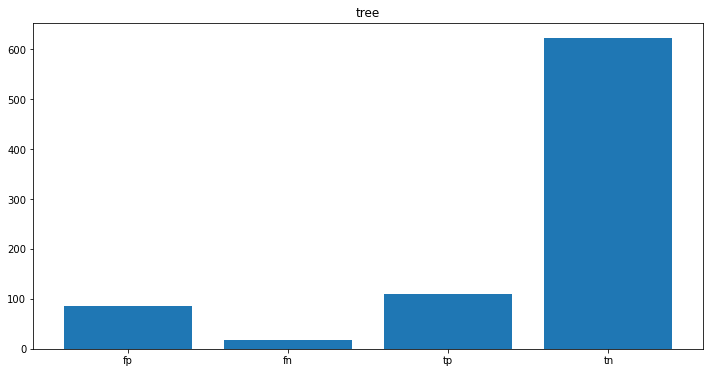

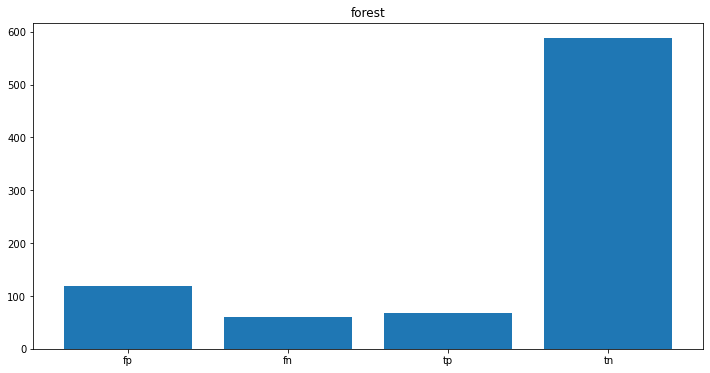

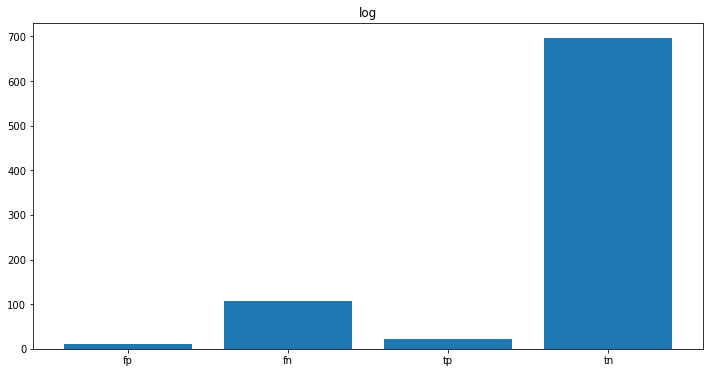

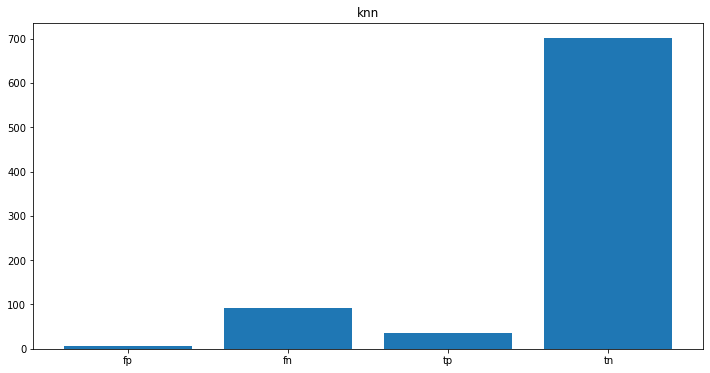

In [288]:
models_list = [xbg,ideal_tree,best_forest,best_log,best_knn]
xbg_dict = {'fp':10,'fn':32,'tp':95,'tn':697}
tree_dict = {'fp':85,'fn':18,'tp':109,'tn':622}
forest_dict = {'fp':119,'fn':60,'tp':67,'tn':588}
log_dict = {'fp':11,'fn':106,'tp':21,'tn':696}
knn_dict = {'fp':6,'fn':91,'tp':36,'tn':701}
dict_list = [xbg_dict,tree_dict,forest_dict,log_dict,knn_dict]
dict_list_str = ['xbg','tree','forest','log','knn']
import matplotlib.pyplot as plt
count = -1
for stuff in dict_list:
    fig, ax = plt.subplots(figsize=(12,6))
    count += 1
    x=list(stuff.keys())
    y=list(stuff.values())
    plt.bar(x=x, height=y)
    ax.set_title(dict_list_str[count])